In [7]:
import pandas as pd
import numpy as np
import networkx as nx
import nxviz as nv
from nxviz import MatrixPlot, ArcPlot, CircosPlot
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

In [2]:
G = nx.read_graphml("graphml/p3_network_all_diseases.graphml")
G_autism = nx.read_graphml("graphml/p3_network_autism_neighbors.graphml")

In [3]:
nx.density(G_autism)

0.1114583490787067

In [38]:
nodes_autism = [[{'diseaseId': n}].append(list(d.items())) for n, d in G.nodes(data=True) if d['is_autism']]

In [40]:
[list(d.items()) for n, d in G.nodes(data=True) if d['is_autism']]

[[('diseaseName', 'Autism Spectrum Disorder'),
  ('diseaseType', 'disease'),
  ('diseaseClass', 'F03'),
  ('diseaseSemanticType', 'Mental or Behavioral Dysfunction'),
  ('autism_subtype_broad', 'Polygenic Autism'),
  ('n_genes', 292),
  ('is_autism', True),
  ('degree', 329),
  ('degree_centrality', 0.0318952981095492),
  ('btw_centrality', 0.00495094347071327)],
 [('diseaseName', 'Hamartoma tumor Syndrome'),
  ('diseaseType', 'disease'),
  ('diseaseClass', 'C04;C16'),
  ('diseaseSemanticType', 'Neoplastic Process'),
  ('autism_subtype_broad', 'Syndromic Autism'),
  ('n_genes', 9),
  ('is_autism', True),
  ('degree', 120),
  ('degree_centrality', 0.011633543383422202),
  ('btw_centrality', 0.0015373576343974333)],
 [('diseaseName', 'Fragile X Syndrome'),
  ('diseaseType', 'disease'),
  ('diseaseClass', 'C10;C16;C23'),
  ('diseaseSemanticType', 'Disease or Syndrome'),
  ('autism_subtype_broad', 'Syndromic Autism'),
  ('n_genes', 3),
  ('is_autism', True),
  ('degree', 29),
  ('degree_ce

In [69]:
nodes_dict = [{'diseaseId': n, **d} for n, d in G.nodes(data=True)]
nodes_df = pd.DataFrame(nodes_dict)

In [170]:
nodes_df.loc[nodes_df['diseaseId']=='A00', 'autism_subtype_broad'] = 'Non-Syndromic Autism'
nodes_df['degree_centrality_log10'] = np.log10(nodes_df['degree_centrality'])
nodes_df['btw_centrality_log10)'] = np.log10(nodes_df['btw_centrality'])
nodes_df['n_genes_log10'] = np.log10(nodes_df['n_genes'])
nodes_df.head()

/usr/local/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,autism_subtype_broad,n_genes,is_autism,degree,degree_centrality,btw_centrality,degree_centrality_log10,btw_centrality_log10,n_genes_log10,log10(degree_centrality+1),log10(btw_centrality+1),btw_centrality_log10)
0,C0019209,Hepatomegaly,phenotype,C06;C23,Finding,Not Autism,43,False,30,0.002908,0.000136,-2.536348,-3.866564,1.633468,-2.536348,-3.866564,-3.866564
1,C0036341,Schizophrenia,disease,F03,Mental or Behavioral Dysfunction,Not Autism,1022,False,472,0.045759,0.004062,-1.339527,-2.391310,3.009451,-1.339527,-2.391310,-2.391310
2,C0002395,Alzheimer's Disease,disease,C10;F03,Disease or Syndrome,Not Autism,84,False,347,0.033640,0.001213,-1.473140,-2.916142,1.924279,-1.473140,-2.916142,-2.916142
3,C0007102,Malignant tumor of colon,disease,C04;C06,Neoplastic Process,Not Autism,150,False,475,0.046049,0.002123,-1.336776,-2.673006,2.176091,-1.336776,-2.673006,-2.673006
4,C0009375,Colonic Neoplasms,group,C04;C06,Neoplastic Process,Not Autism,143,False,464,0.044983,0.001783,-1.346951,-2.748746,2.155336,-1.346951,-2.748746,-2.748746


In [171]:
nodes_autism_df = nodes_df[nodes_df['is_autism']]
nodes_autism_df

,diseaseId,diseaseName,diseaseType,diseaseClass,diseaseSemanticType,autism_subtype_broad,n_genes,is_autism,degree,degree_centrality,btw_centrality,degree_centrality_log10,btw_centrality_log10,n_genes_log10,log10(degree_centrality+1),log10(btw_centrality+1),btw_centrality_log10)
87,A00,Autism Spectrum Disorder,disease,F03,Mental or Behavioral Dysfunction,Non-Syndromic Autism,292,True,329,0.031895,4.950943e-03,-1.496273,-2.305312,2.465383,-1.496273,-2.305312,-2.305312
965,A09,Hamartoma tumor Syndrome,disease,C04;C16,Neoplastic Process,Syndromic Autism,9,True,120,0.011634,1.537358e-03,-1.934288,-2.813225,0.954243,-1.934288,-2.813225,-2.813225
1354,A02,Fragile X Syndrome,disease,C10;C16;C23,Disease or Syndrome,Syndromic Autism,3,True,29,0.002811,7.641914e-05,-2.551071,-4.116798,0.477121,-2.551071,-4.116798,-4.116798
1547,A16,Digeorge Syndrome,disease,C05;C14;C15;C16;C19;C23,Disease or Syndrome,Syndromic Autism,18,True,12,0.001163,1.992163e-05,-2.934288,-4.700675,1.255273,-2.934288,-4.700675,-4.700675
2038,A08,Neurofibromatosis,disease,C04;C09;C10;C16;C17;C23,Disease or Syndrome,Syndromic Autism,32,True,77,0.007465,6.009356e-04,-2.126979,-3.221172,1.505150,-2.126979,-3.221172,-3.221172
2039,A14,Noonan Syndrome,disease,C04;C05;C10;C14;C16;C17;C23,Disease or Syndrome,Syndromic Autism,35,True,90,0.008725,1.539550e-03,-2.059227,-2.812606,1.544068,-2.059227,-2.812606,-2.812606
2207,A06,Timothy Syndrome,disease,C05;C14;C16;C23;F03,Disease or Syndrome,Syndromic Autism,1,True,1,0.000097,0.000000e+00,-4.013469,-inf,0.000000,-4.013469,-inf,-inf
2263,A10,Down Syndrome,disease,C04;C09;C10;C11;C15;C16;C23;F01;F03,Disease or Syndrome,Syndromic Autism,23,True,66,0.006398,1.181883e-04,-2.193925,-3.927426,1.361728,-2.193925,-3.927426,-3.927426
3458,A07,Smith-Lemli-Opitz Syndrome,disease,C16;C18,Disease or Syndrome,Syndromic Autism,1,True,1,0.000097,0.000000e+00,-4.013469,-inf,0.000000,-4.013469,-inf,-inf
3487,A15,William Syndrome,disease,C10;C14;C16,Disease or Syndrome,Syndromic Autism,10,True,0,0.000000,0.000000e+00,-inf,-inf,1.000000,-inf,-inf,-inf


## Visualisation

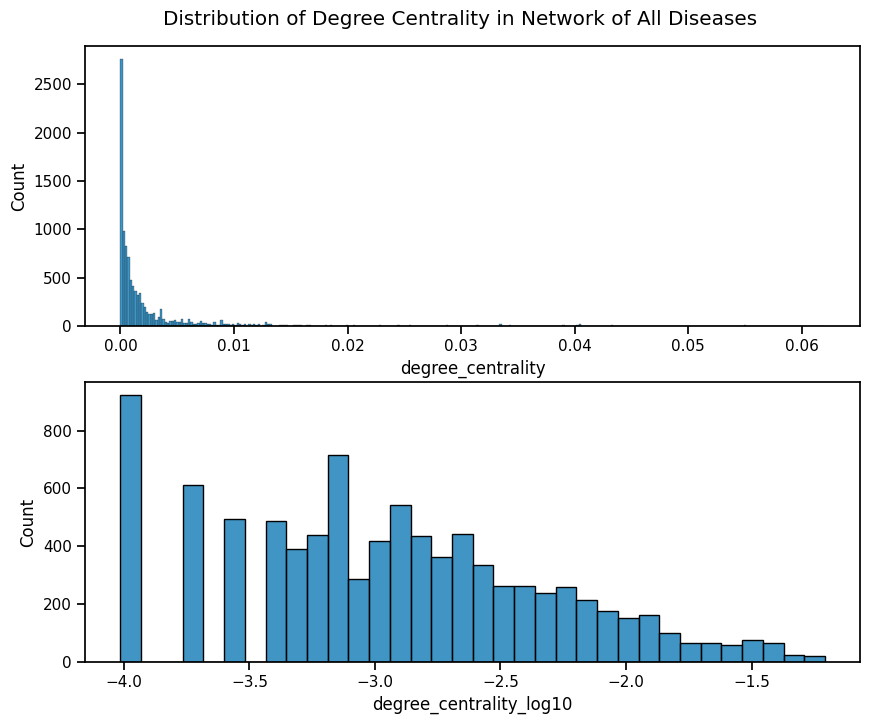

In [155]:
sns.set_context("notebook")
plt.style.use('seaborn-v0_8-colorblind')

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

sns.histplot(data=nodes_df, x='degree_centrality', ax=axes[0])
sns.histplot(data=nodes_df, x='degree_centrality_log10', ax=axes[1])

plt.suptitle('Distribution of Degree Centrality in Network of All Diseases', y=0.925)

plt.savefig("../figures/network/degree_cent_distribution.png", bbox_inches='tight')
plt.show()

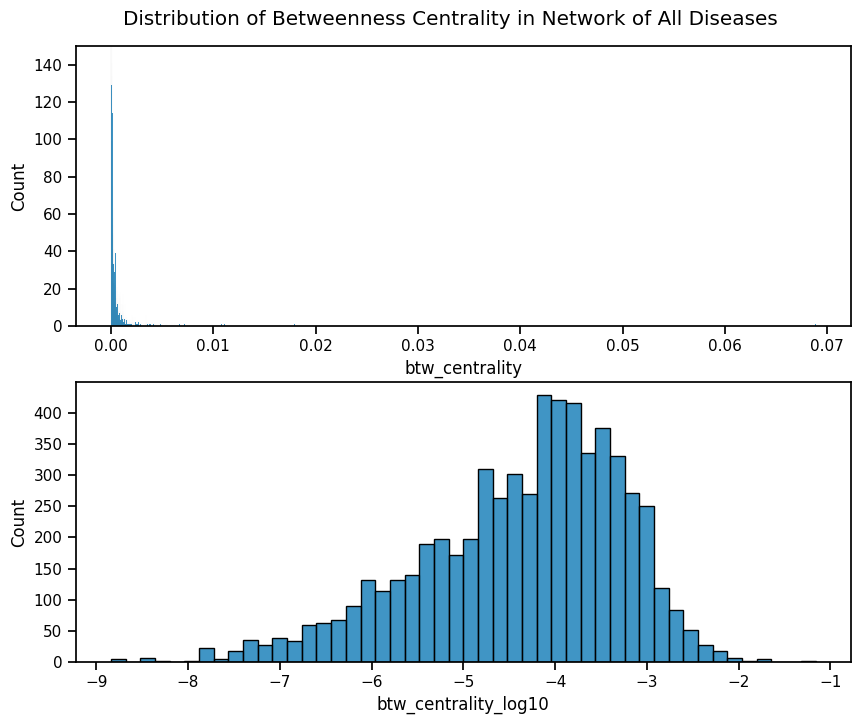

In [156]:
sns.set_context("notebook")
plt.style.use('seaborn-v0_8-colorblind')

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

sns.histplot(data=nodes_df, x='btw_centrality', ax=axes[0])
axes[0].set_ylim([0, 150])
sns.histplot(data=nodes_df, x='btw_centrality_log10', ax=axes[1])

plt.suptitle('Distribution of Betweenness Centrality in Network of All Diseases', y=0.925)

plt.savefig("../figures/network/btw_cent_distribution.png", bbox_inches='tight')
plt.show()

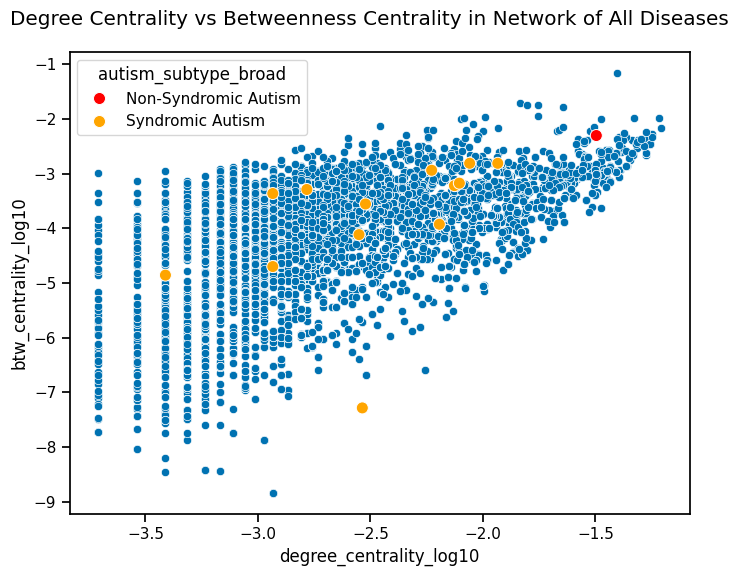

In [168]:
sns.set_context("notebook")
plt.style.use('seaborn-v0_8-colorblind')

fig, ax = plt.subplots(figsize=(8, 6))

sns.scatterplot(data=nodes_df, x='degree_centrality_log10', y='btw_centrality_log10', ax=ax, alpha=1)
sns.scatterplot(data=nodes_autism_df, x='degree_centrality_log10', y='btw_centrality_log10', 
                hue='autism_subtype_broad', palette=['red', 'orange'], s=75, ax=ax)

plt.suptitle('Degree Centrality vs Betweenness Centrality in Network of All Diseases', y=0.95)
plt.savefig("../figures/network/degree_cent_by_btw_cent_log10_.png", bbox_inches='tight')
plt.show()

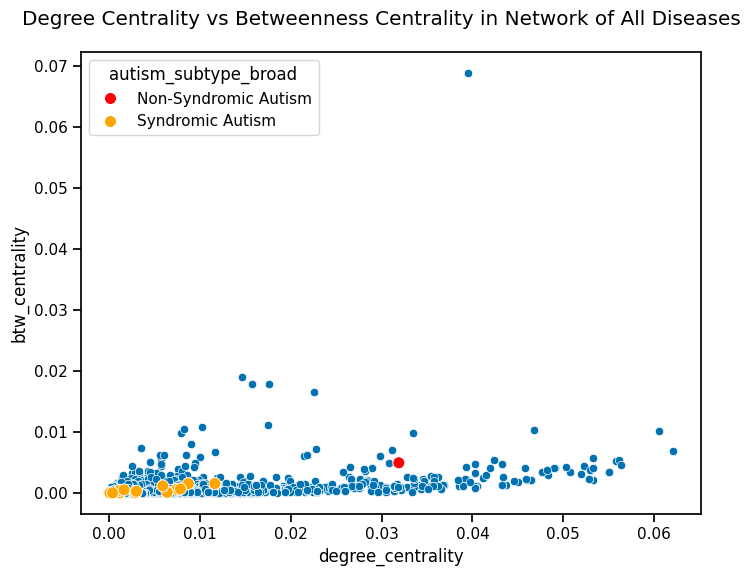

In [173]:
sns.set_context("notebook")
plt.style.use('seaborn-v0_8-colorblind')

fig, ax = plt.subplots(figsize=(8, 6))

sns.scatterplot(data=nodes_df, x='degree_centrality', y='btw_centrality', ax=ax, alpha=1)
sns.scatterplot(data=nodes_autism_df, x='degree_centrality', y='btw_centrality', 
                hue='autism_subtype_broad', palette=['red', 'orange'], s=75, ax=ax)

plt.suptitle('Degree Centrality vs Betweenness Centrality in Network of All Diseases', y=0.95)
plt.savefig("../figures/network/degree_cent_by_btw_cent_.png", bbox_inches='tight')
plt.show()

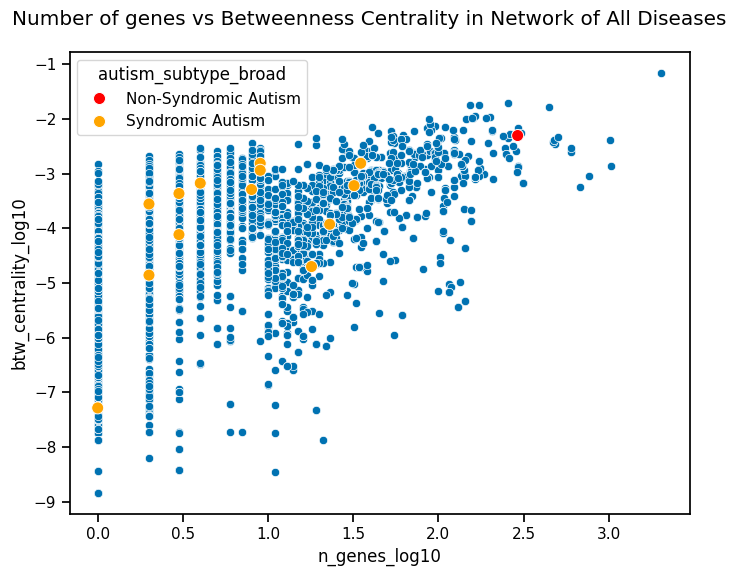

In [176]:
sns.set_context("notebook")
plt.style.use('seaborn-v0_8-colorblind')

fig, ax = plt.subplots(figsize=(8, 6))

sns.scatterplot(data=nodes_df, x='n_genes_log10', y='btw_centrality_log10', ax=ax, alpha=1)
sns.scatterplot(data=nodes_autism_df, x='n_genes_log10', y='btw_centrality_log10', 
                hue='autism_subtype_broad', palette=['red', 'orange'], s=75, ax=ax)

plt.suptitle('Number of genes vs Betweenness Centrality in Network of All Diseases', y=0.95)
plt.savefig("../figures/network/n_genes_by_btw_cent_log10_.png", bbox_inches='tight')
plt.show()

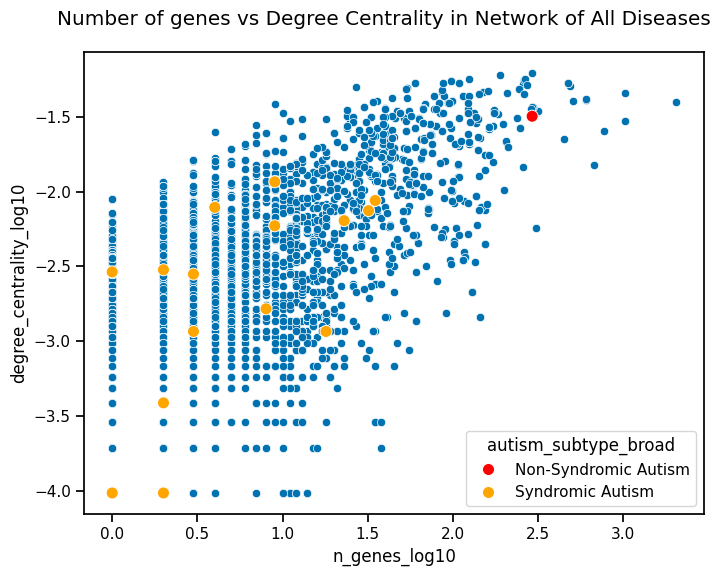

In [177]:
sns.set_context("notebook")
plt.style.use('seaborn-v0_8-colorblind')

fig, ax = plt.subplots(figsize=(8, 6))

sns.scatterplot(data=nodes_df, x='n_genes_log10', y='degree_centrality_log10', ax=ax, alpha=1)
sns.scatterplot(data=nodes_autism_df, x='n_genes_log10', y='degree_centrality_log10', 
                hue='autism_subtype_broad', palette=['red', 'orange'], s=75, ax=ax)

plt.suptitle('Number of genes vs Degree Centrality in Network of All Diseases', y=0.95)
plt.savefig("../figures/network/n_genes_by_degree_cent_log10_.png", bbox_inches='tight')
plt.show()

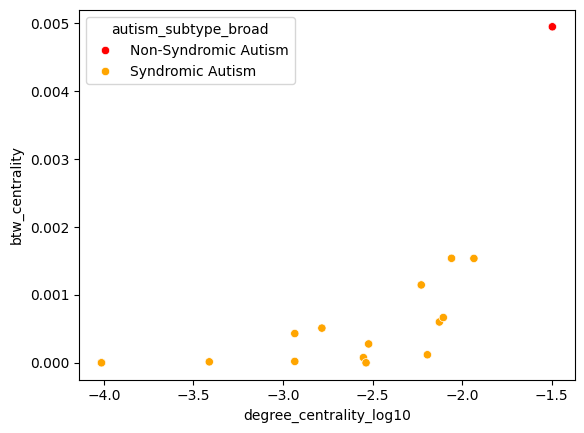

In [142]:
sns.scatterplot(data=nodes_autism_df, x='degree_centrality_log10', y='btw_centrality', 
                hue='autism_subtype_broad', palette=['red', 'orange'])
plt.show()

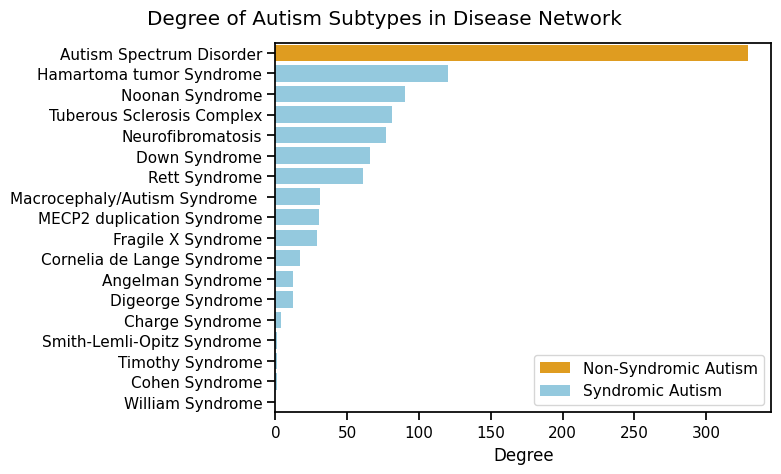

In [205]:
nodes_autism_df = nodes_autism_df.sort_values(by='degree', ascending=False)
g = sns.barplot(data=nodes_autism_df, x='degree', y='diseaseName', hue='autism_subtype_broad', palette=['orange', 'skyblue'])
g.set(xlabel="Degree", ylabel="")
plt.legend(loc='lower right', bbox_to_anchor=(1, 0), ncol=1)
plt.suptitle('Degree of Autism Subtypes in Disease Network ', x=0.3, y=0.95)

plt.savefig("../figures/network/autism_degree.png", bbox_inches='tight')
plt.show()

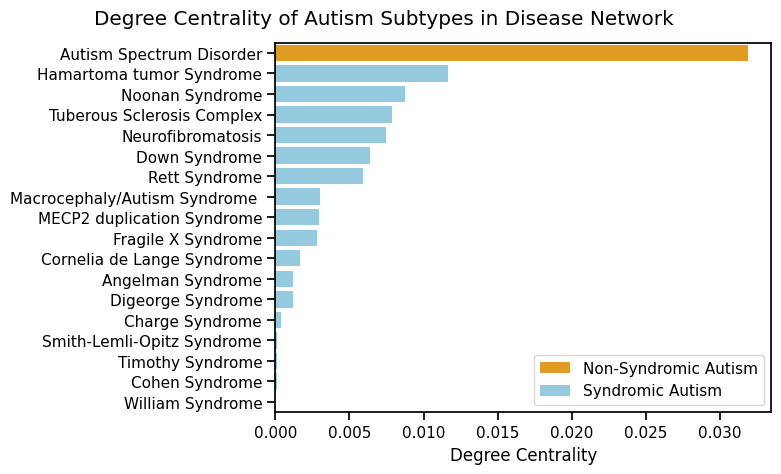

In [208]:
nodes_autism_df = nodes_autism_df.sort_values(by='degree_centrality', ascending=False)
g = sns.barplot(data=nodes_autism_df, x='degree_centrality', y='diseaseName', hue='autism_subtype_broad', palette=['orange', 'skyblue'])
g.set(xlabel="Degree Centrality", ylabel="")
plt.legend(loc='lower right', bbox_to_anchor=(1, 0), ncol=1)
plt.suptitle('Degree Centrality of Autism Subtypes in Disease Network ', x=0.3, y=0.95)

plt.savefig("../figures/network/autism_degree_centrality.png", bbox_inches='tight')
plt.show()

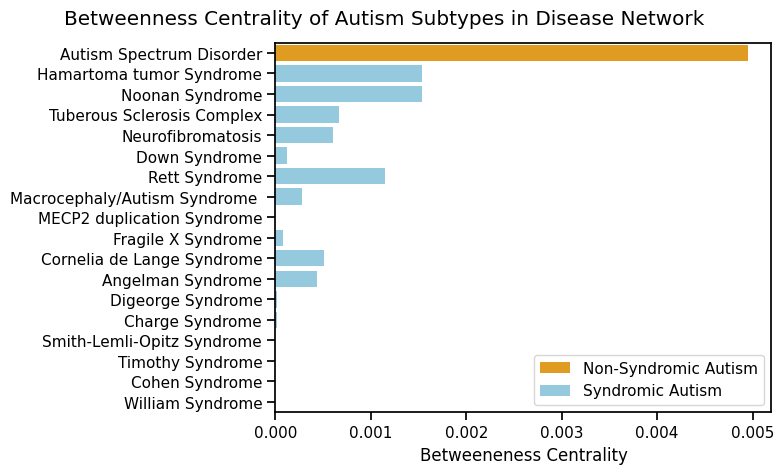

In [209]:
# nodes_autism_df = nodes_autism_df.sort_values(by='btw_centrality', ascending=False)
g = sns.barplot(data=nodes_autism_df, x='btw_centrality', y='diseaseName', hue='autism_subtype_broad', palette=['orange', 'skyblue'])
g.set(xlabel="Betweeneness Centrality", ylabel="")
plt.legend(loc='lower right', bbox_to_anchor=(1, 0), ncol=1)
plt.suptitle('Betweenness Centrality of Autism Subtypes in Disease Network ', x=0.3, y=0.95)

plt.savefig("../figures/network/autism_btw_centrality.png", bbox_inches='tight')
plt.show()